In [4]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.2 MB/s eta 0:00:00


In [5]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [6]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

In [ ]:
# Task 1 : Predict the statevector after H on |0>, |1>, |+>, |->.

Analytical predictions (H * state):

H |0> = [0.707 0.707]
H |1> = [ 0.707 -0.707]
H |+> = [1. 0.]
H |-> = [0. 1.]
--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


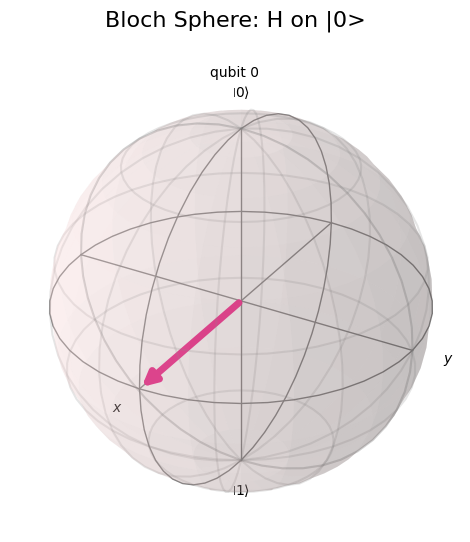

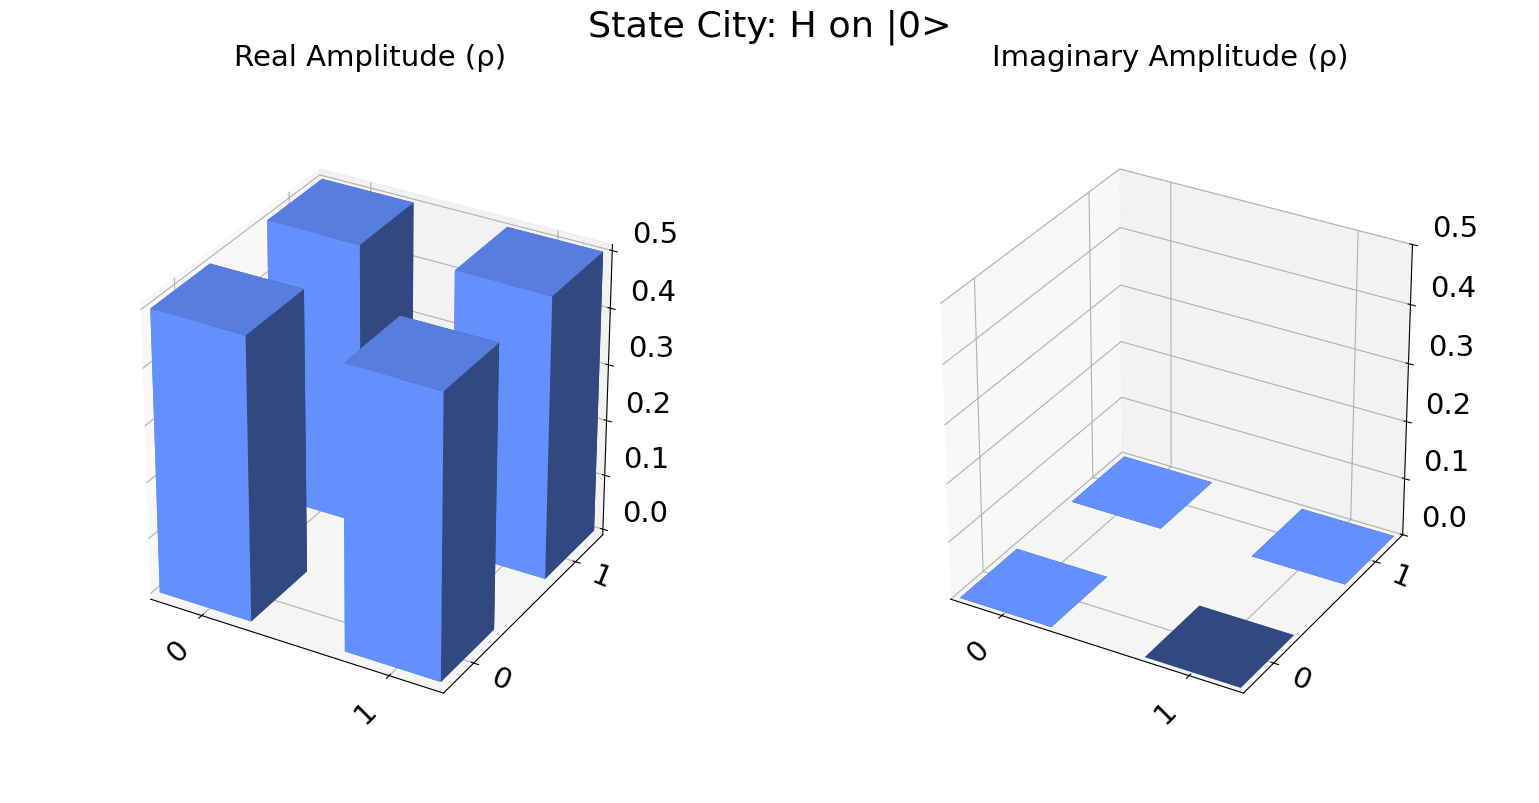

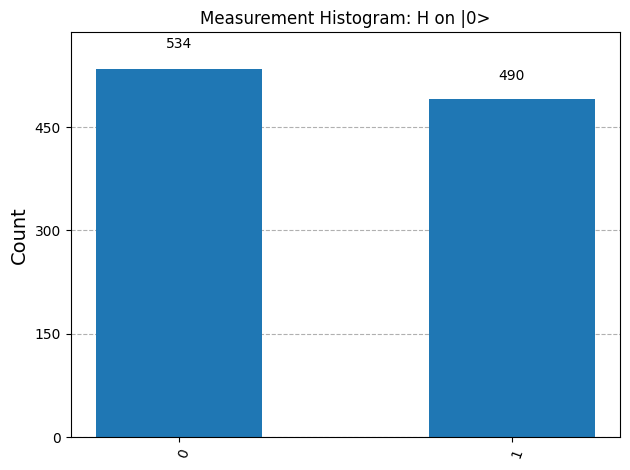



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


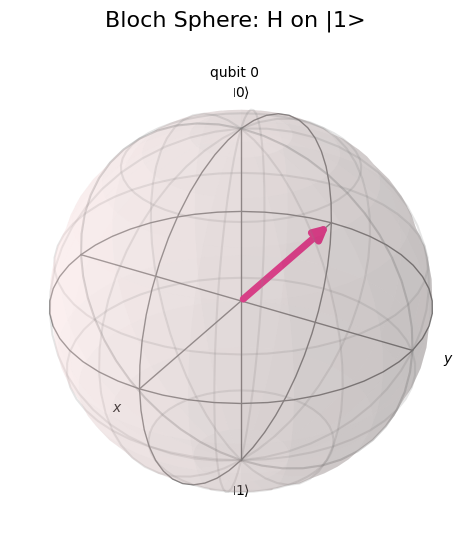

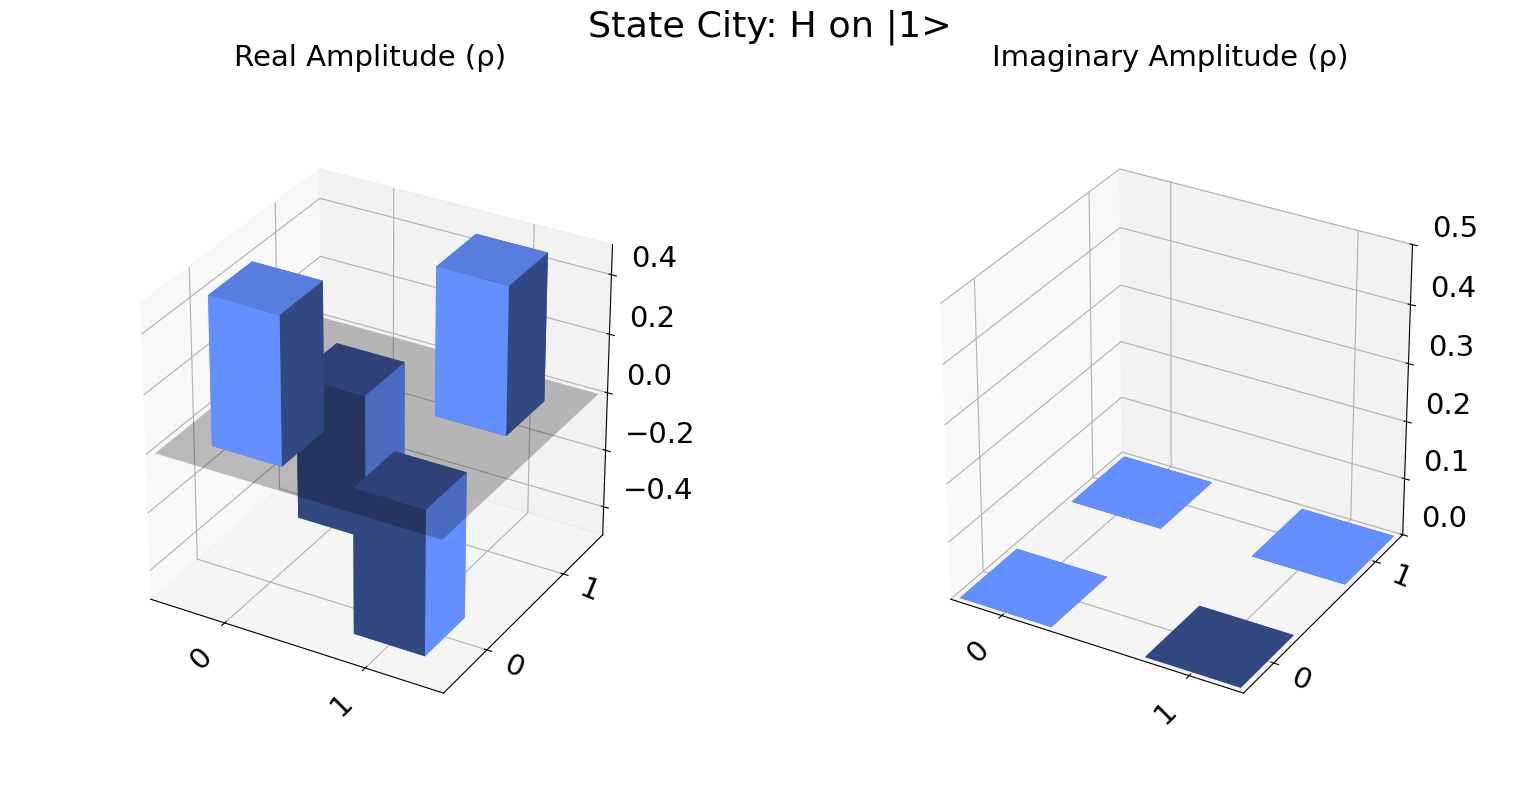

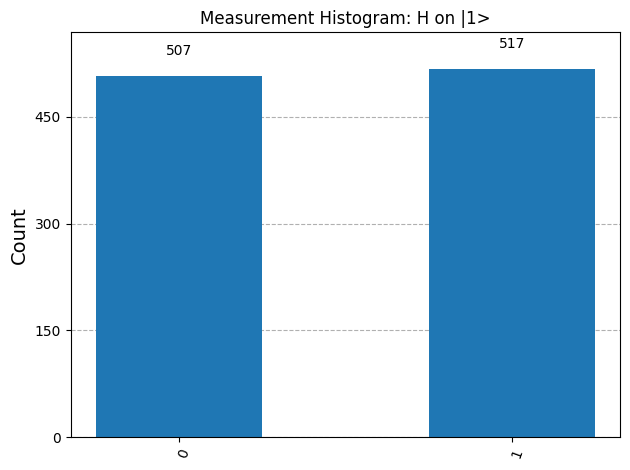



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


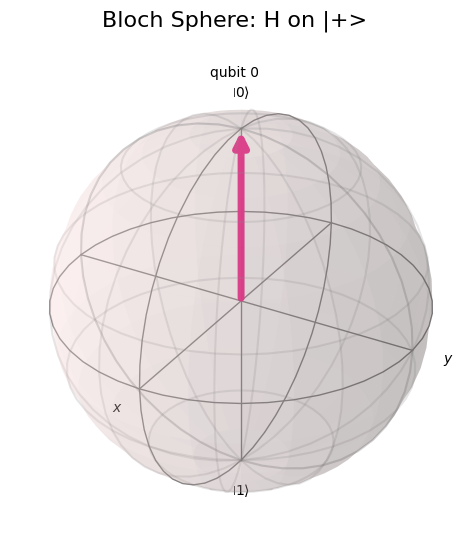

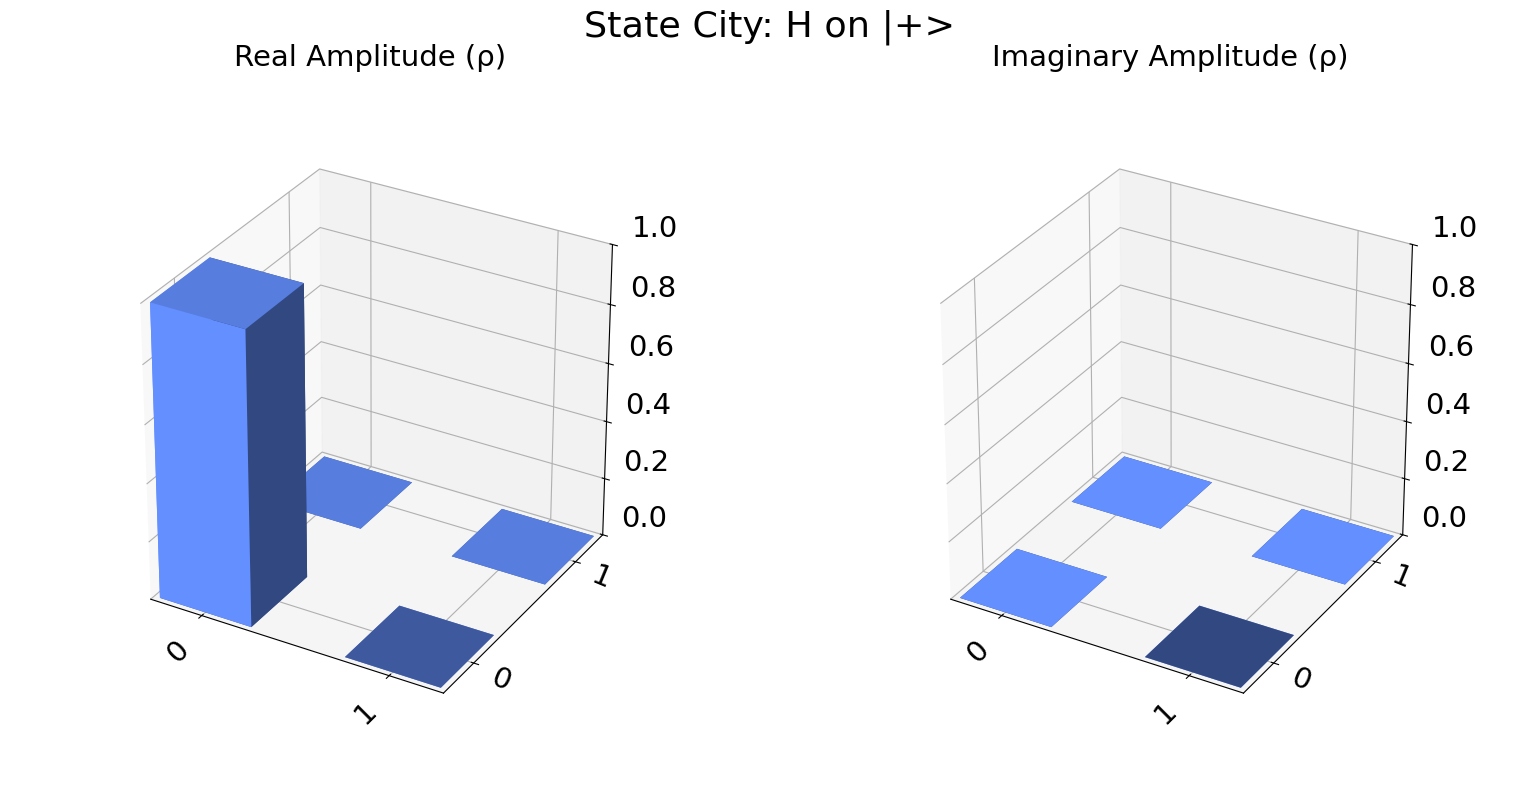

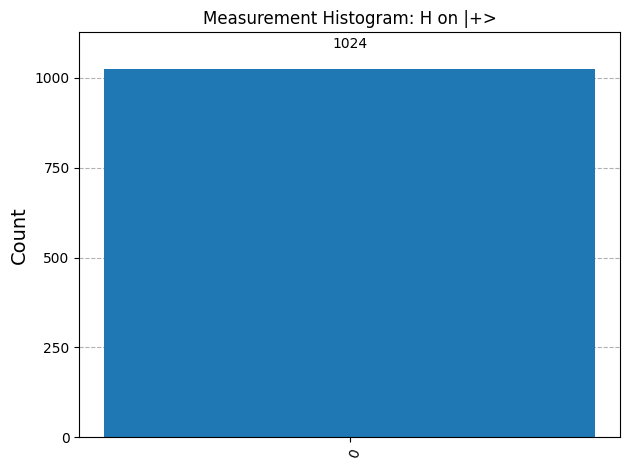



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


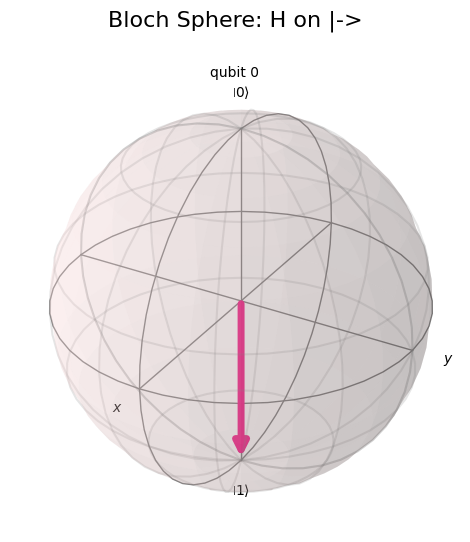

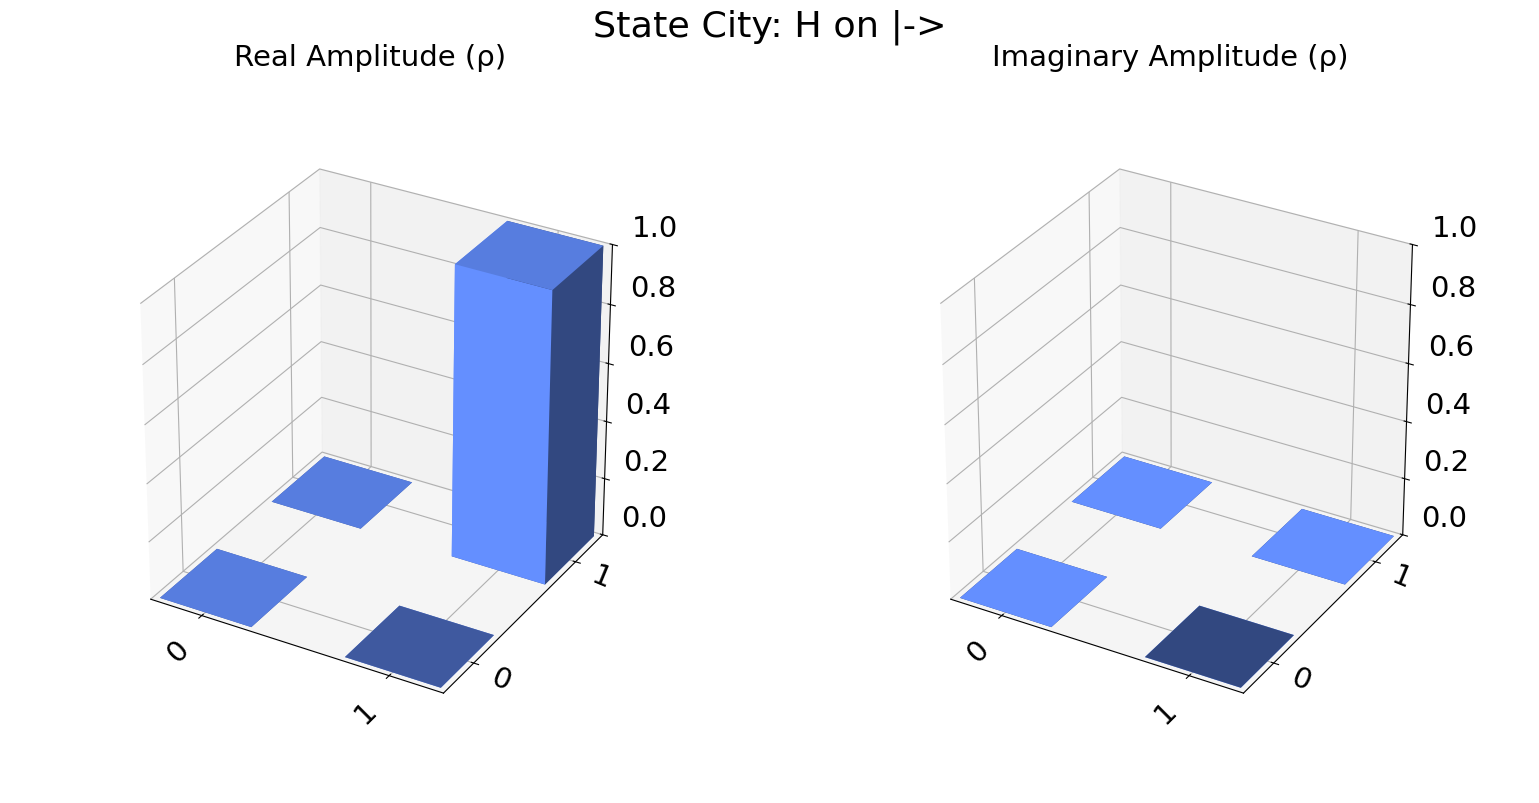

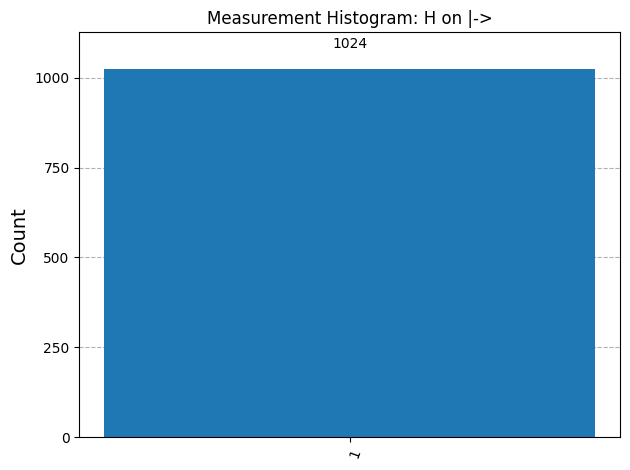

In [7]:
import numpy as np

H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

states = {
    "|0>": np.array([1, 0]),
    "|1>": np.array([0, 1]),
    "|+>": np.array([1/np.sqrt(2), 1/np.sqrt(2)]),
    "|->": np.array([1/np.sqrt(2), -1/np.sqrt(2)])
}

print("Analytical predictions (H * state):\n")
for label, vec in states.items():
    result = H @ vec
    print(f"H {label} = {np.round(result, 3)}")

for label, vec in states.items():
    visualize_hadamard(vec, label)


In [ ]:
'''
When the Hadamard gate is applied to the state |0>, it creates the superposition (|0> + |1>)/√2, which means the qubit has equal probability of being measured as 0 or 1. Applying it to |1> gives (|0> – |1>)/√2, again a superposition but with a phase difference. If the input is |+>, the Hadamard changes it back to |0>, and if it is |–>, it becomes |1>. This shows that the Hadamard gate is its own inverse. On the Bloch sphere, the |0> and |1> states, which are on the Z-axis, rotate to the X-axis after the gate is applied, while |+> and |–> rotate back to the Z-axis.
'''

In [ ]:
# Task 2 : Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities.

--- 3-qubit H⊗H⊗H on |000> ---
Statevector: [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]


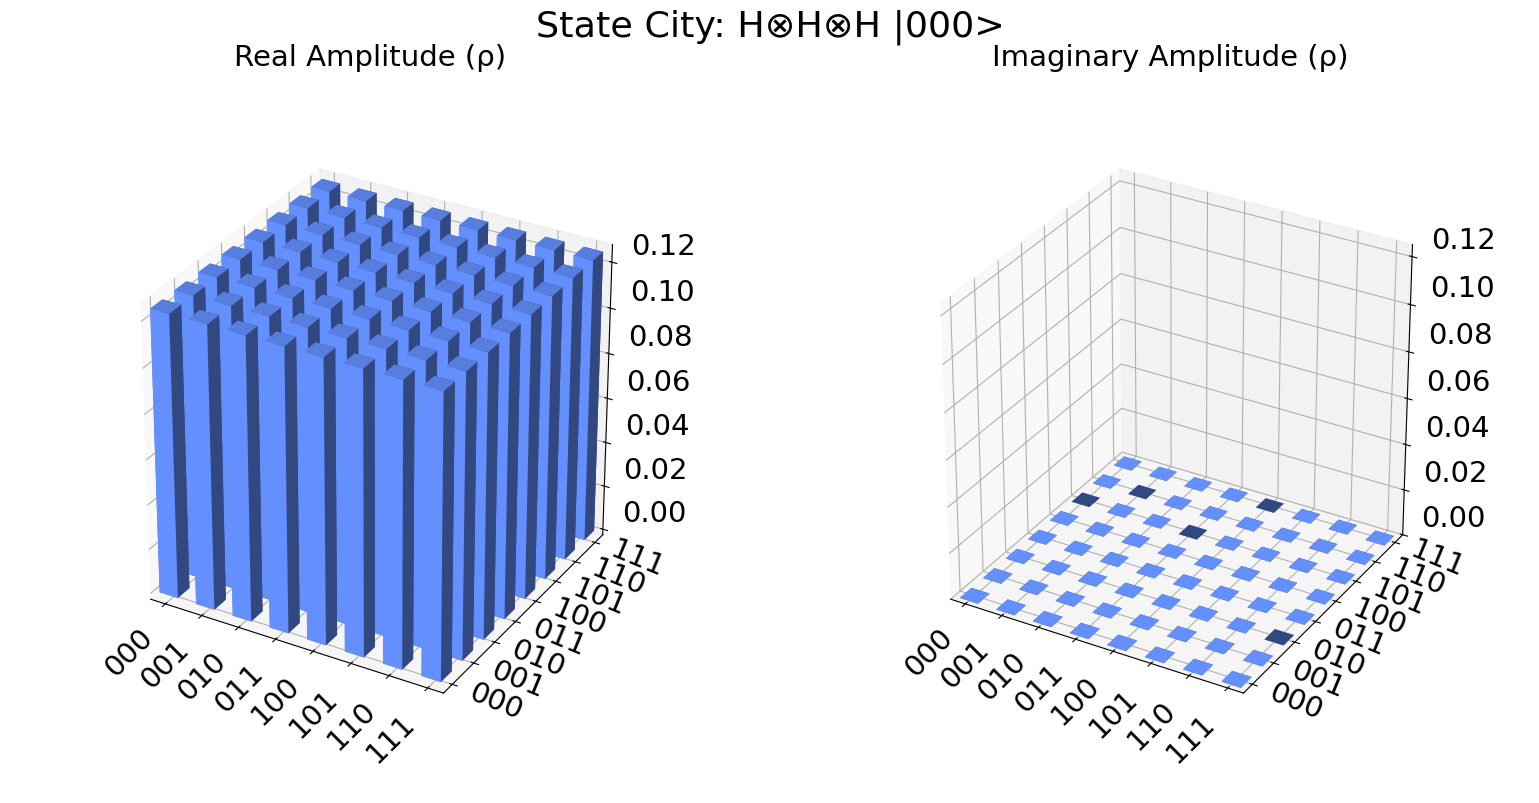

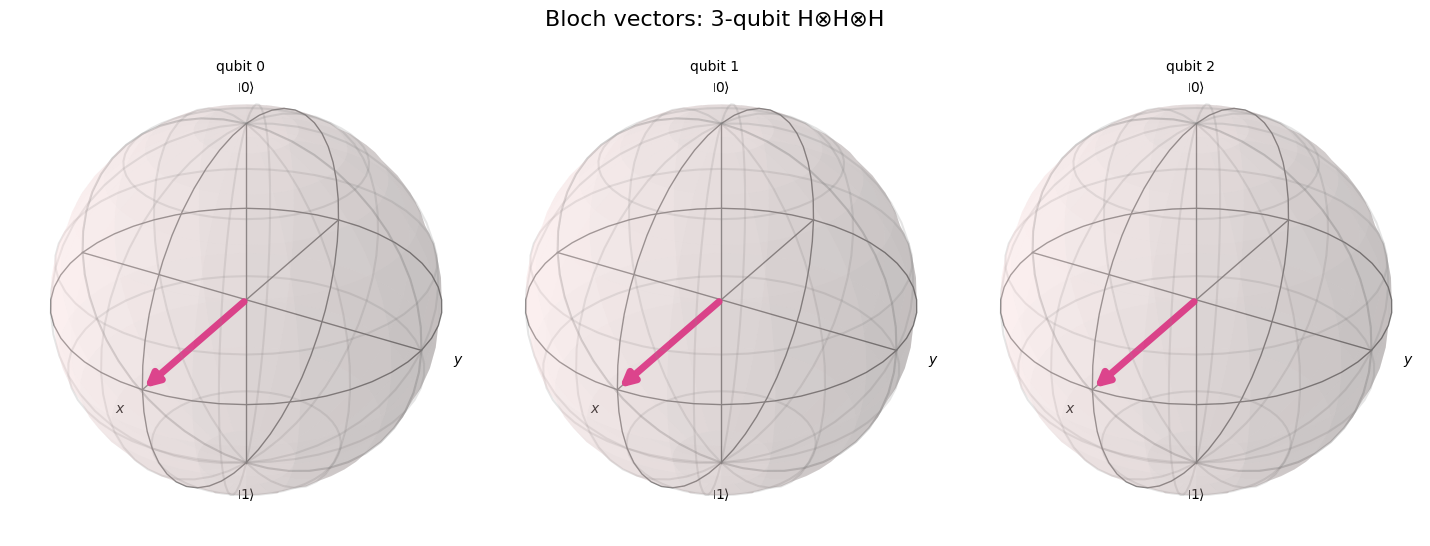

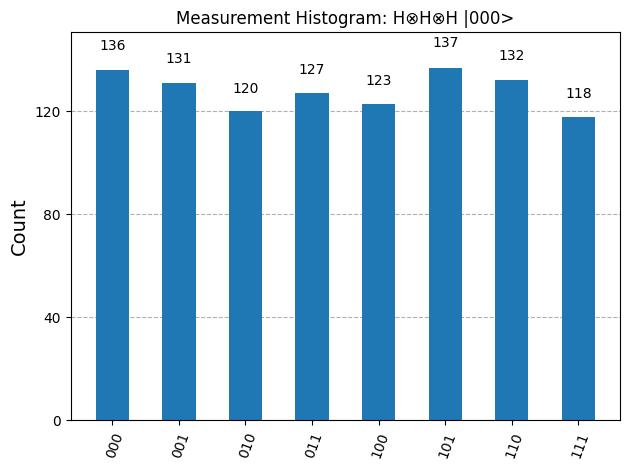


Analytical: Equal probability for all 8 basis states.


In [ ]:
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- 3-qubit H⊗H⊗H on |000> ---")
print("Statevector:", np.round(state3.data, 3))

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

sim = AerSimulator()
result3 = sim.run(transpile(qc3, sim), shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("\nAnalytical: Equal probability for all 8 basis states.")


In [ ]:
'''
After applying the Hadamard gate to all three qubits, each qubit enters an equal superposition of |0> and |1>. The overall state becomes a combination of all eight possible basis states with equal amplitude. This means that if we measure the qubits, every outcome from |000> to |111> should appear with roughly equal probability. The Bloch sphere shows that all three qubits point along the +X direction, confirming they are in uniform superposition.
'''

In [ ]:
# Task 3: Apply H + CX + CX on 3 qubits and analyze correlations.

--- GHZ-like entangled state ---
Statevector: [0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


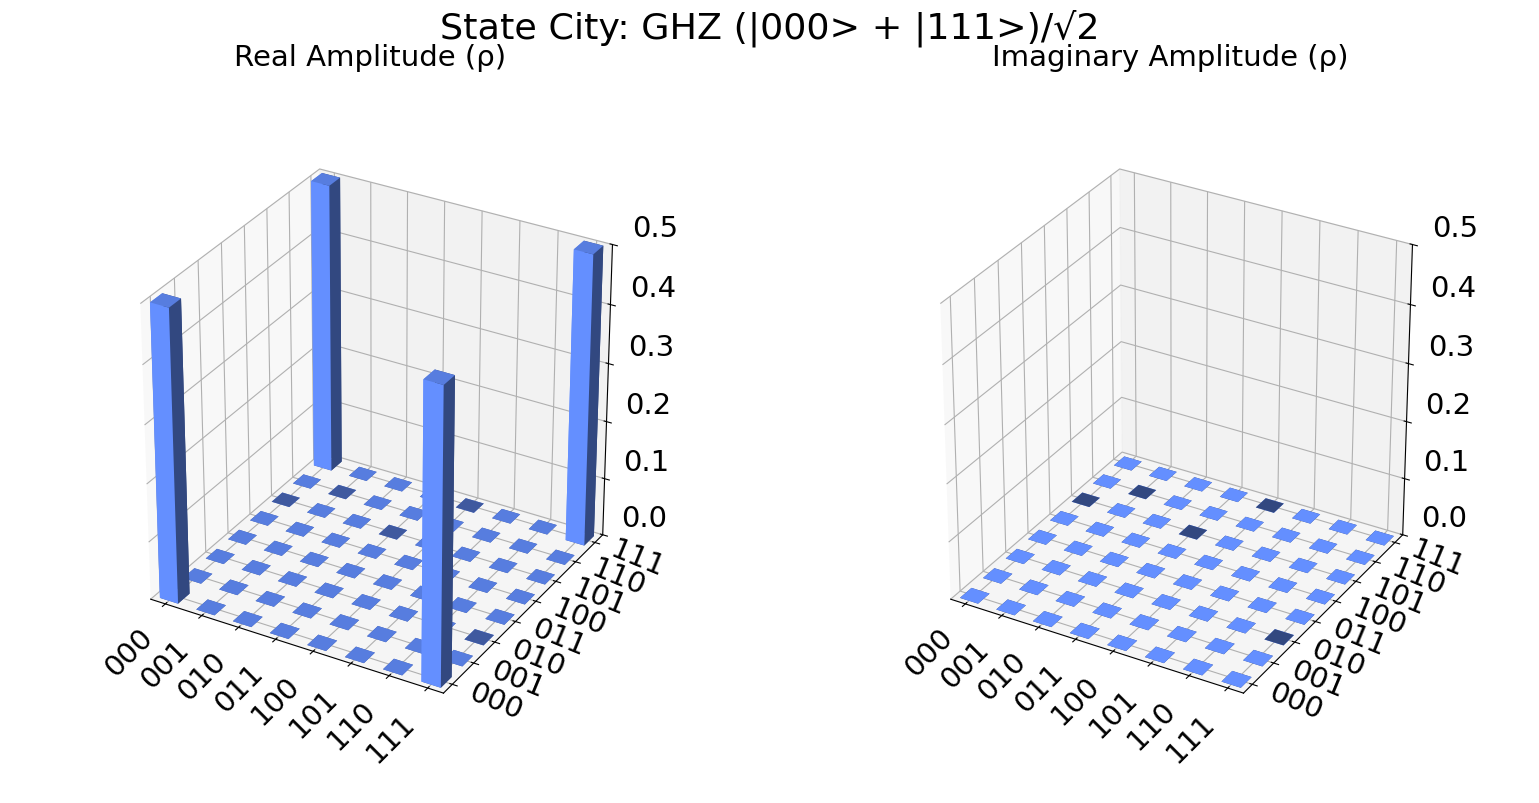

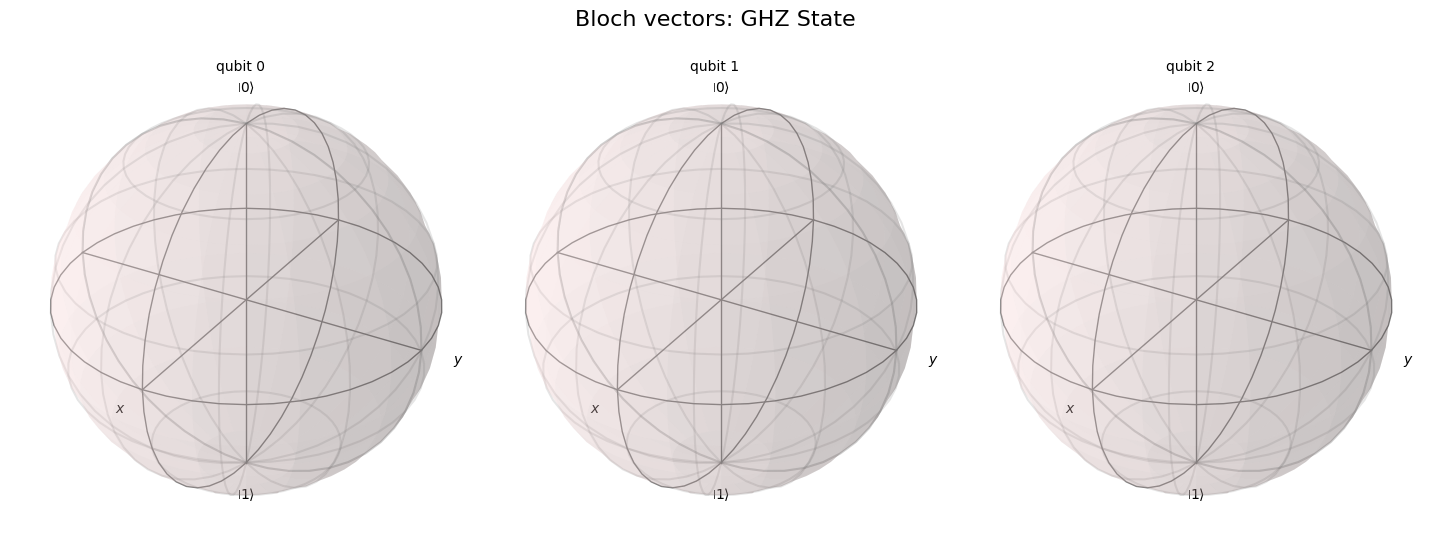

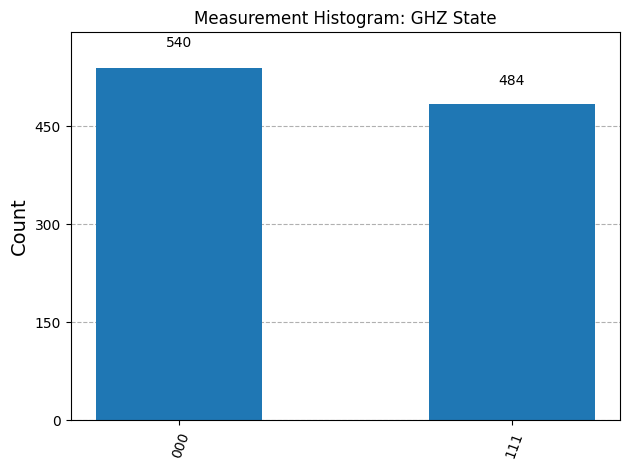


Analytical: Only |000> and |111> outcomes, perfectly correlated.


In [ ]:
qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0, 1)
qc_ghz_state.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_ghz_state)

print("--- GHZ-like entangled state ---")
print("Statevector:", np.round(state_ghz.data, 3))

display(plot_state_city(state_ghz, title="State City: GHZ (|000> + |111>)/√2"))
display(plot_bloch_multivector(state_ghz, title="Bloch vectors: GHZ State"))

sim = AerSimulator()
result_ghz = sim.run(transpile(qc_ghz, sim), shots=1024).result()
counts_ghz = result_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement Histogram: GHZ State"))

print("\nAnalytical: Only |000> and |111> outcomes, perfectly correlated.")


In [ ]:
'''In this circuit, the first Hadamard creates a superposition on the first qubit, and the two CNOT gates copy that superposition to the other qubits. The result is the GHZ state, (|000> + |111>)/√2, which is an entangled state. When measured, we only get |000> or |111>, each with about 50% probability. The Bloch sphere plots show that each qubit alone looks mixed, but together the qubits are perfectly correlated, meaning if one is measured as 0, all are 0, and if one is 1, all are 1.
'''

In [ ]:
# Task 4 : Apply H twice on |1> and verify the original state.

In [ ]:
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
state_after = Statevector.from_instruction(qc_h2)

print("Statevector after H•H on |1>:", np.round(state_after.data, 3))
print("Original |1> =", [0, 1])
print("\nVerification: H•H = Identity, state returned to |1>.")


Statevector after H•H on |1>: [0.+0.j 1.+0.j]
Original |1> = [0, 1]

Verification: H•H = Identity, state returned to |1>.


In [ ]:
'''
Applying the Hadamard gate twice to the state |1> returns it to its original state. This happens because the Hadamard is its own inverse, meaning two applications cancel each other out. On the Bloch sphere, the first Hadamard moves the vector from the south pole to the equator, and the second one brings it back down, confirming that the final state is again |1>.
'''

In [ ]:
# Task 5 : Use Bloch sphere plots to observe qubit rotations after Hadamard.

Bloch visualization for H on |0>:
--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


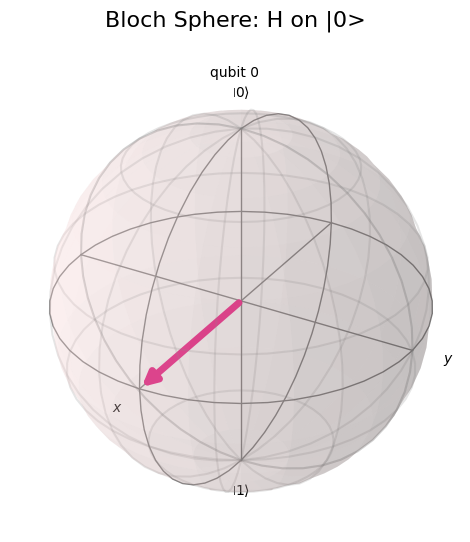

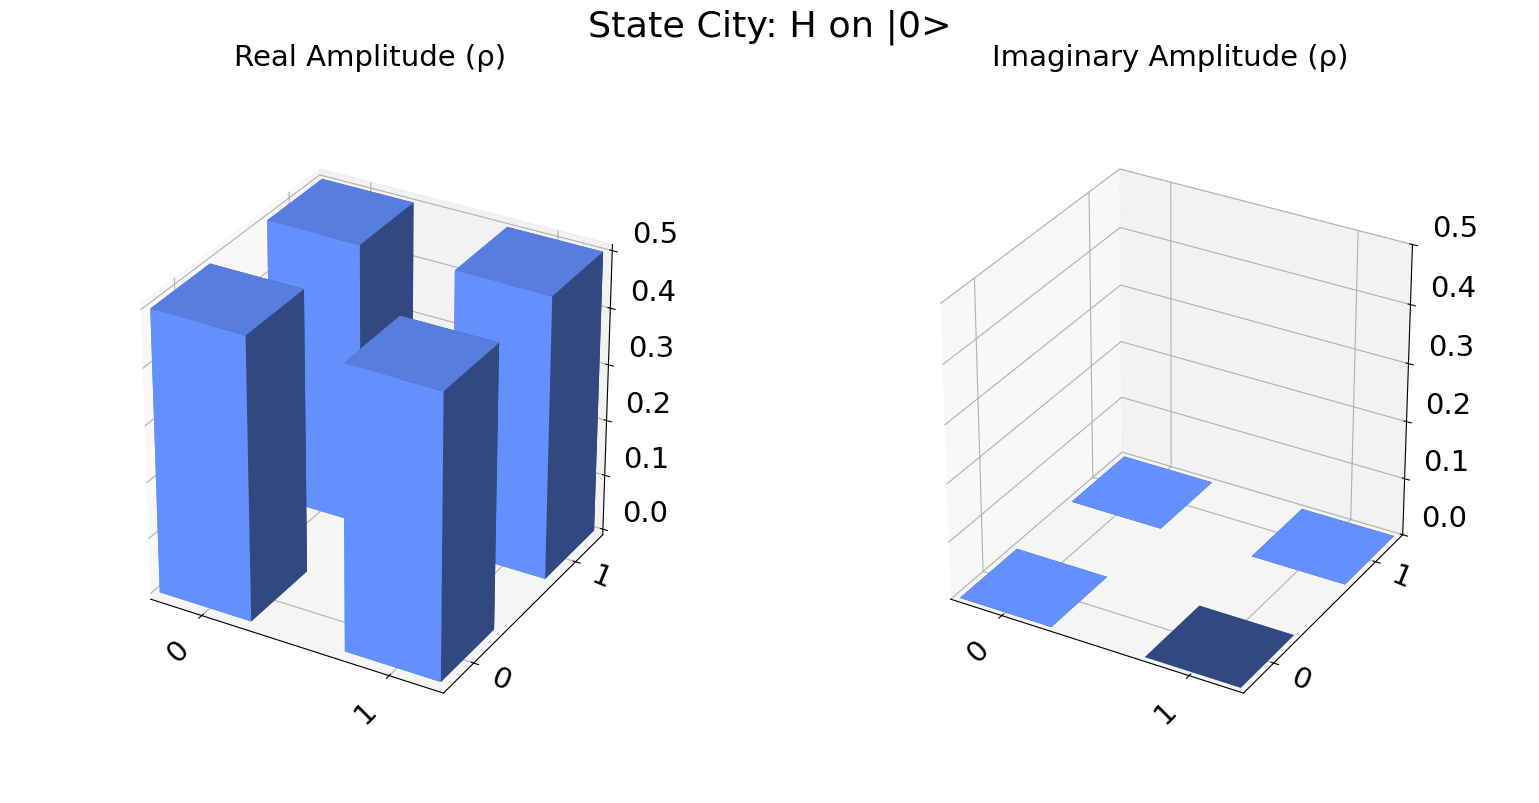

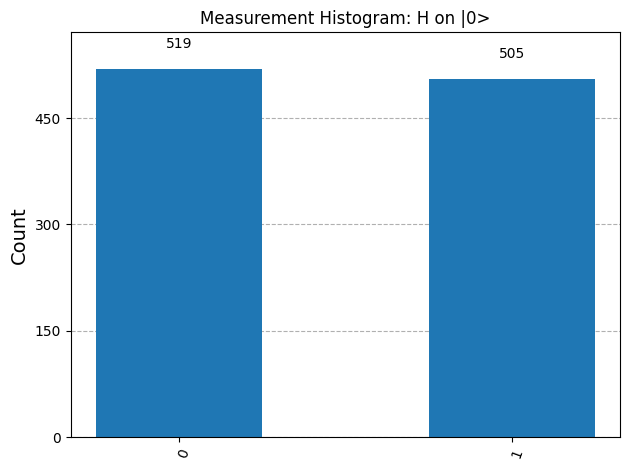



Bloch visualization for H on |1>:
--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


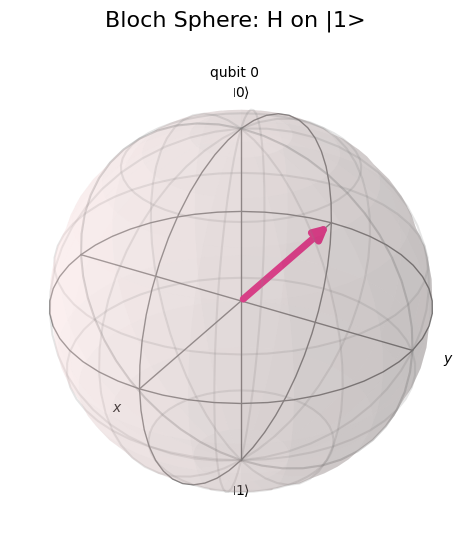

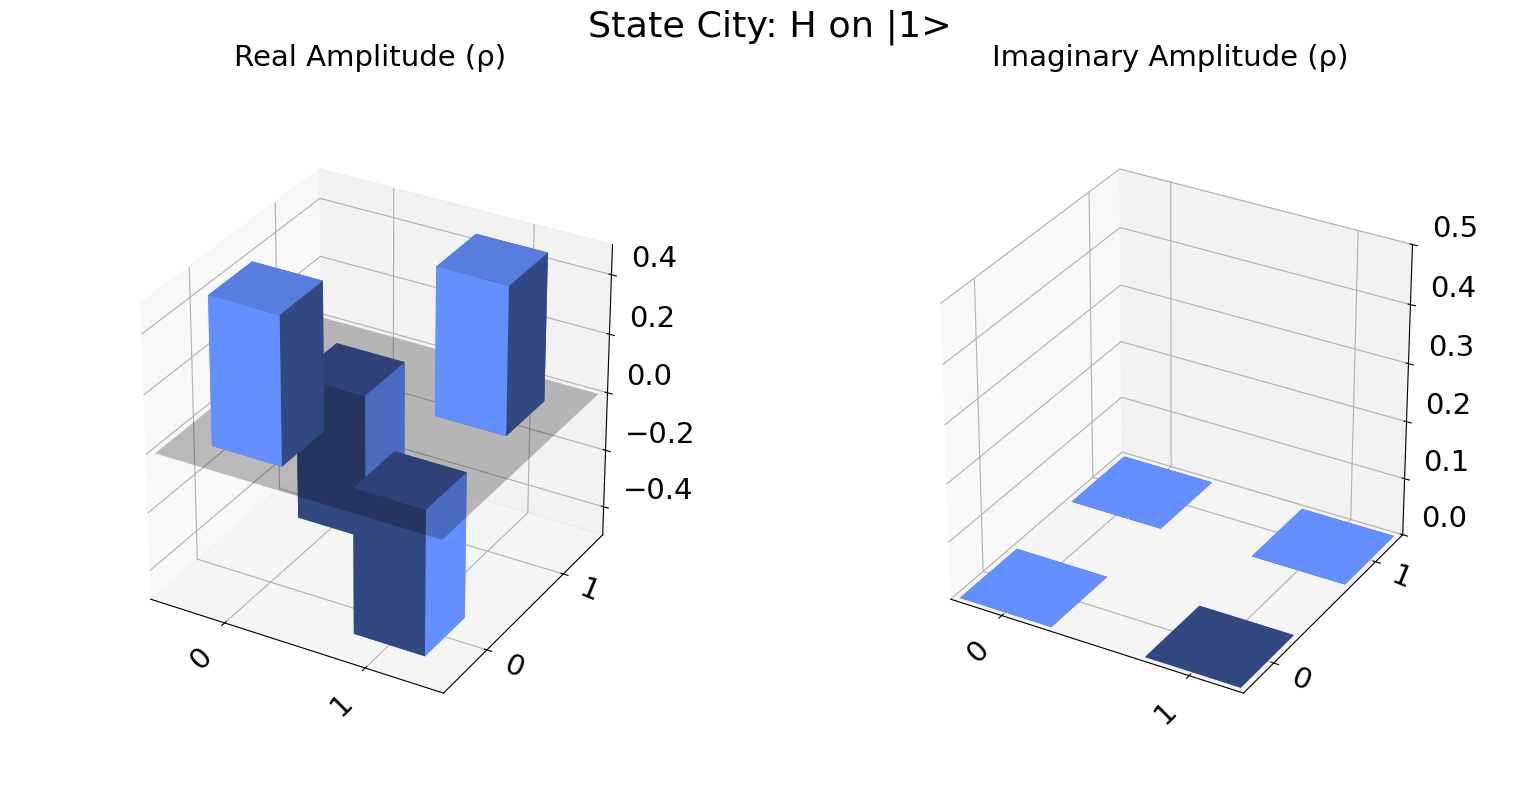

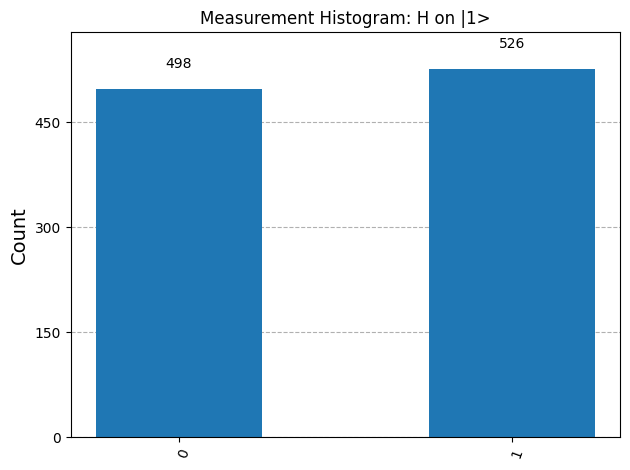



Bloch visualization for H on |+>:
--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


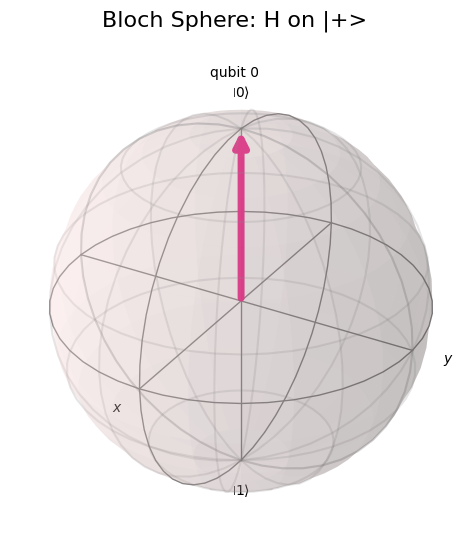

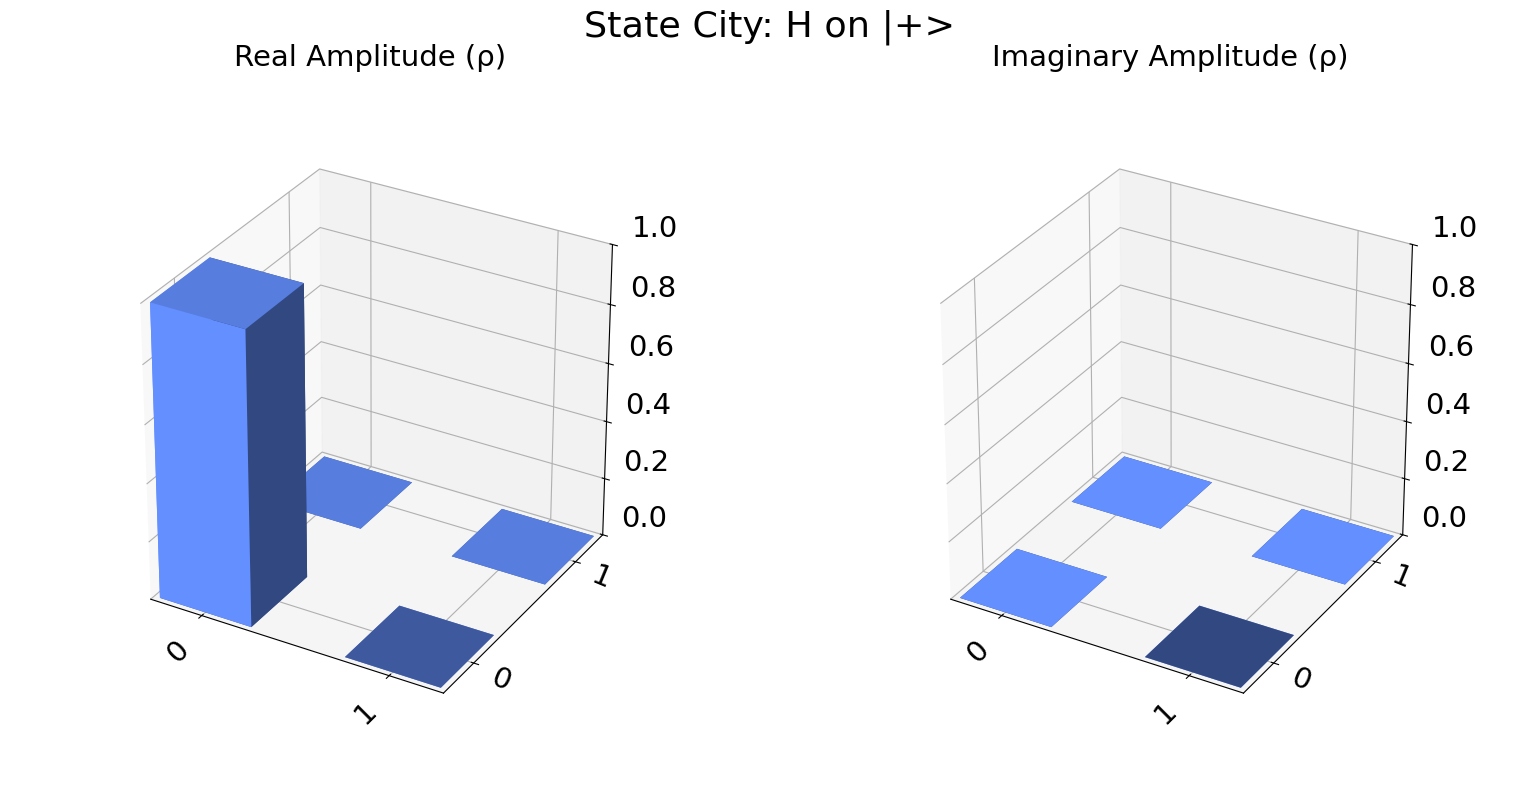

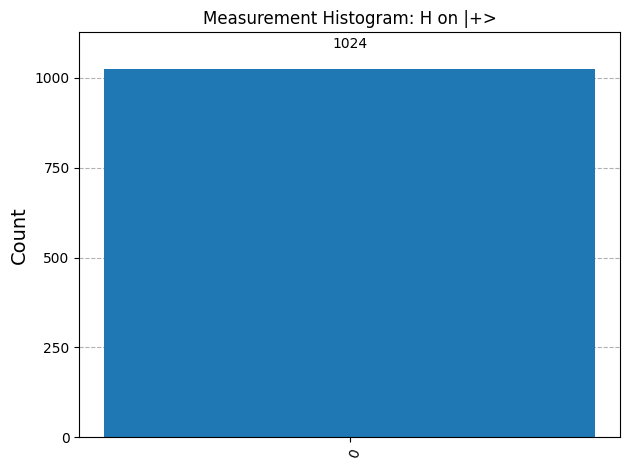



Bloch visualization for H on |->:
--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


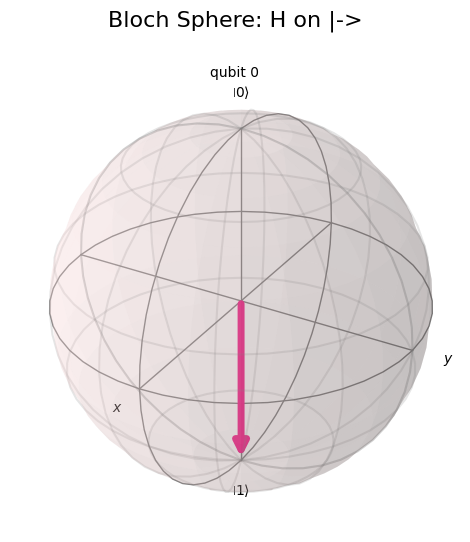

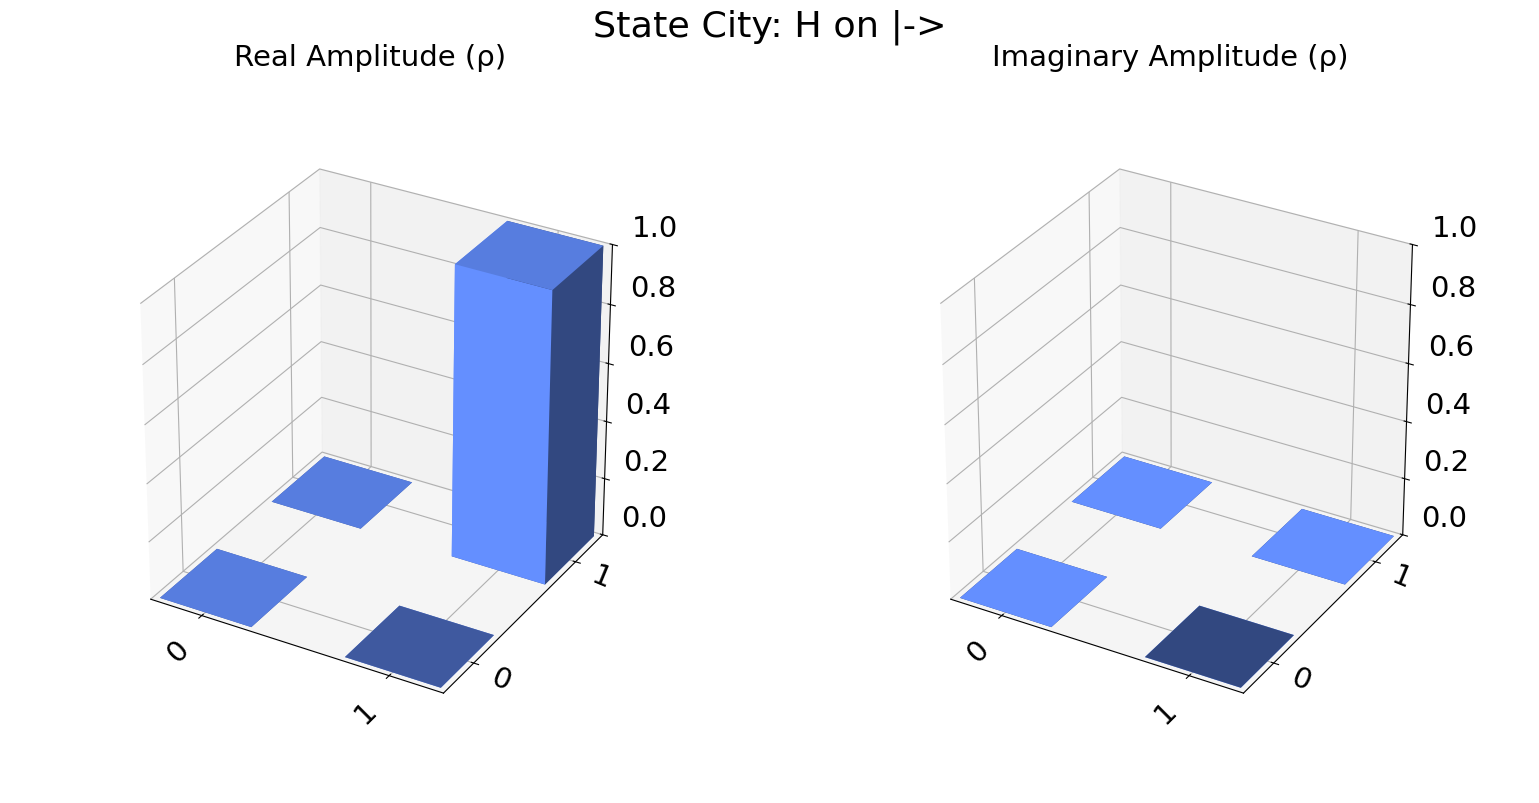

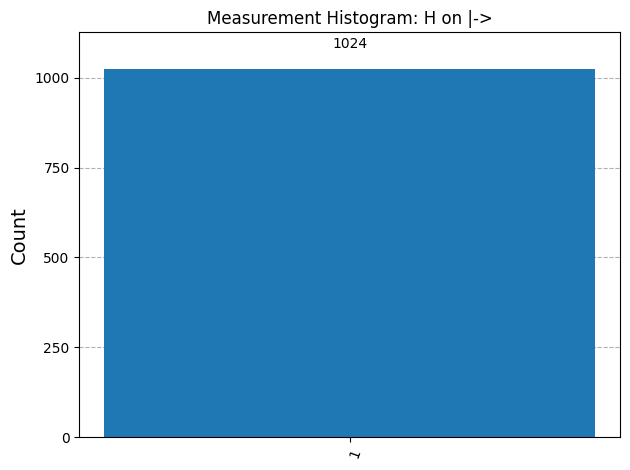

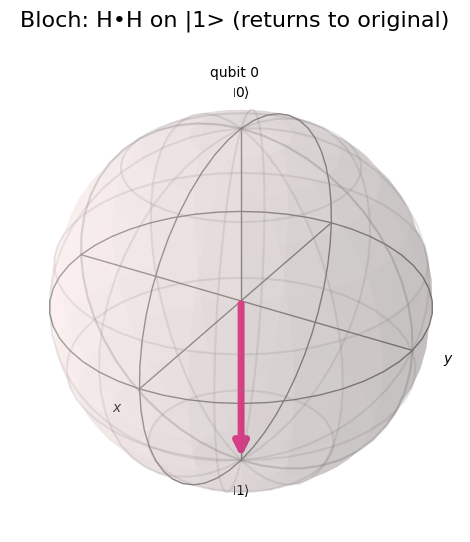

In [ ]:
print("Bloch visualization for H on |0>:")
visualize_hadamard(np.array([1, 0]), "|0>")

print("Bloch visualization for H on |1>:")
visualize_hadamard(np.array([0, 1]), "|1>")

print("Bloch visualization for H on |+>:")
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

print("Bloch visualization for H on |->:")
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")

from qiskit.visualization import plot_bloch_multivector
qc_double = QuantumCircuit(1)
qc_double.initialize([0, 1], 0)
qc_double.h(0)
qc_double.h(0)
state_double = Statevector.from_instruction(qc_double)
display(plot_bloch_multivector(state_double, title="Bloch: H•H on |1> (returns to original)"))


In [ ]:
'''
On the Bloch sphere, the Hadamard gate can be seen as a rotation that moves states between the Z-axis and the X-axis. When it acts on |0>, the qubit moves to the +X direction, forming the |+> state. When it acts on |1>, it moves to the –X direction, forming the |–> state. If we apply it to |+> or |–>, the states return to |0> and |1> respectively. This visually confirms that the Hadamard gate is its own inverse and shows how it transforms pure states into equal superpositions.
'''